## Taller 5

### Pregunta 1
Load the car dataset, remove the rows with missing data and leave only the columns with numeric values.

In [2]:
import numpy as np
import pandas as pd

In [3]:
file = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
data_cars = pd.read_csv(file)

In [5]:
# First we inspect the data
data_cars.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [6]:
# See which variables have missing values aggregating the null values for each column:
data_cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [8]:
# We remove missing data:
data_cars.dropna(inplace = True)
# Now we check our new dataset
data_cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [9]:
# We see that there is not more missing values. After this we select only columns with numeric types:
numeric_data = data_cars._get_numeric_data()
numeric_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Define the variable to predict $y$ as the price , and the feature matrix $X$ as the rest of the numeric variables.

In [31]:
y = numeric_data['price']
X = numeric_data.drop('price',axis = 1)
# Check variables
print(y.head())
print(X.shape)

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64
(196, 18)


Separate the dataset into subsets of train and test.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

Perform a linear regression by Least Squares and compute the intercept, the coefficients and the scores of training and testing. 

In [37]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# We create the linear model object:
linear = LinearRegression(normalize = True)
# We fit the linear model to the training dataset
linear.fit(X_train,y_train)
# Now we see R square adjust of the linear regression:
print("==== R adjust in training data ==== ")
print('R2 = ' , linear.score(X_train,y_train))
print("==== R adjust in test data ==== ")
print('R2 = ' , linear.score(X_test,y_test))


==== R adjust in training data ==== 
R2 =  0.8907508038721415
==== R adjust in test data ==== 
R2 =  0.8211101745439607


This mean that our model explain the 89% of the variability of the data, which is a good R square.
Now lets see the others coefficientes:

In [34]:
print("Slopes: \n")
for i in range(len(linear.coef_)):
    print("Slope w_",i+1," = ",linear.coef_[i] )
print("\n")
print("Intercept -- w0 = ",linear.intercept_)

Slopes: 

Slope w_ 1  =  -237.12603737741546
Slope w_ 2  =  -0.5291197814089144
Slope w_ 3  =  36.21077402801217
Slope w_ 4  =  -19283.122251707213
Slope w_ 5  =  39097.29057046743
Slope w_ 6  =  220.84935718103367
Slope w_ 7  =  0.07079132723073994
Slope w_ 8  =  119.47403442435555
Slope w_ 9  =  -837.6380816880223
Slope w_ 10  =  -3096.6476847267345
Slope w_ 11  =  833.3000340638155
Slope w_ 12  =  22.264254769800225
Slope w_ 13  =  1.3823267149784384
Slope w_ 14  =  94.0785450193361
Slope w_ 15  =  169.34712821551153
Slope w_ 16  =  1603.4433435816852
Slope w_ 17  =  -2913.363201894742
Slope w_ 18  =  2913.3632018947496


Intercept -- w0 =  -67701.8185277414


40


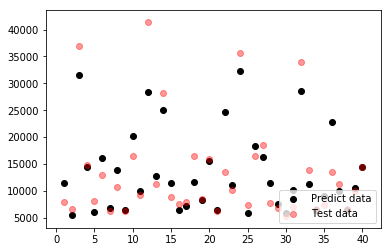

In [55]:
# Predictions
y_pred = linear.predict(X_test)
print(len(y_pred))
size_test = list(range(1,len(y_test)+1))
plt.scatter(size_test,y_pred, color = 'black',label = r'Predict data')
plt.scatter(size_test,y_test,color = 'red',alpha = 0.4,label = r'Test data')
plt.legend(loc ='lower right')

Now perform a Ridge Regression and compute the intercept , the coefficient , 
the training and test score.

In [56]:
from sklearn.linear_model import Ridge


In [63]:
# RidgeModel
ridge = Ridge(alpha = 1,normalize = True)
# Training the model
ridge.fit(X_train,y_train)
print("==== Coefficients of Ridge Regression ====")
print(" R square in training data")
print(" R2 " , ridge.score(X_train,y_train))
print(" R square in test data")
print(" R2 " , ridge.score(X_test,y_test))
print(" ============================= ")
print(" COEFFICIENTS AND INTERCEPT")
print("w0 = ",ridge.intercept_)
for i in range(len(ridge.coef_)):
    print( "w_",i+1, " = ",ridge.coef_[i] )

==== Coefficients of Ridge Regression ====
 R square in training data
 R2  0.7922188588833037
 R square in test data
 R2  0.7319520772376079
 COEFFICIENTS AND INTERCEPT
w0 =  -32118.246221079928
w_ 1  =  85.98314605429259
w_ 2  =  2.620703131213272
w_ 3  =  56.860620902162744
w_ 4  =  5241.793961938491
w_ 5  =  23807.707312711067
w_ 6  =  -1.5110804909579096
w_ 7  =  1.5057192531711534
w_ 8  =  38.70047812356458
w_ 9  =  805.688551339375
w_ 10  =  -746.2764465476686
w_ 11  =  70.64784120120245
w_ 12  =  30.434054900187164
w_ 13  =  0.0820283998137285
w_ 14  =  -60.37573802327961
w_ 15  =  -59.124216310816664
w_ 16  =  374.703972262513
w_ 17  =  686.1335505989891
w_ 18  =  -686.1335505989899


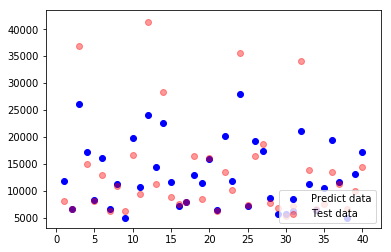

In [66]:
y_pred_Ridge = ridge.predict(X_test)
size_test = list(range(1,len(y_pred_Ridge)+1))
plt.scatter(size_test,y_pred_Ridge, color = 'blue',label = r'Predict data')
plt.scatter(size_test,y_test,color = 'red',alpha = 0.4,label = r'Test data')
plt.legend(loc ='lower right')

Implement the Ridge regression with the scale variables for the next values of the regularization values

$ \alpha $ = [0,1,10,20,50,100,1000]


 Alpha  =  0
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8907508038721412
The R2 in the TEST DATA  is :  0.8211101745439635
 w0(Intercept) =  -37100.01163535856
 ===== Slopes ==== 
w_ 1 =  -0.5291197814096903
w_ 2 =  36.210774028013454
w_ 3 =  -19283.12225170672
w_ 4 =  39097.290570467616
w_ 5 =  220.84935718104057
w_ 6 =  0.07079132723077461
w_ 7 =  119.47403442435949
w_ 8 =  -837.6380816881242
w_ 9 =  -3096.6476847269414
w_ 10 =  833.300034063558
w_ 11 =  22.26425476980012
w_ 12 =  1.3823267149785938
w_ 13 =  94.07854501928661
w_ 14 =  169.34712821555158
w_ 15 =  1603.4433435815715
w_ 16 =  -33515.170094272165
w_ 17 =  -27688.443690486052


 Scatter Plot Predict vs Real Values


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.802158e-18
  overwrite_a=True).T


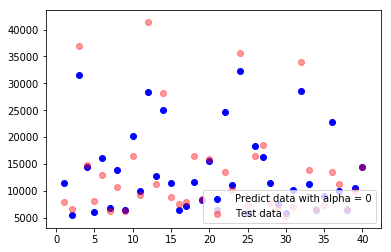

 Alpha  =  1
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.7922188588833037
The R2 in the TEST DATA  is :  0.7319520772376079
 w0(Intercept) =  -32118.246221079928
 ===== Slopes ==== 
w_ 1 =  2.620703131213272
w_ 2 =  56.860620902162744
w_ 3 =  5241.793961938491
w_ 4 =  23807.707312711067
w_ 5 =  -1.5110804909579096
w_ 6 =  1.5057192531711534
w_ 7 =  38.70047812356458
w_ 8 =  805.688551339375
w_ 9 =  -746.2764465476686
w_ 10 =  70.64784120120245
w_ 11 =  30.434054900187164
w_ 12 =  0.0820283998137285
w_ 13 =  -60.37573802327961
w_ 14 =  -59.124216310816664
w_ 15 =  374.703972262513
w_ 16 =  686.1335505989891
w_ 17 =  -686.1335505989899


 Scatter Plot Predict vs Real Values


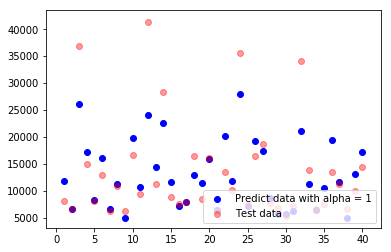

 Alpha  =  10
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.5052323530958678
The R2 in the TEST DATA  is :  0.4523162042663652
 w0(Intercept) =  -11282.098327874794
 ===== Slopes ==== 
w_ 1 =  2.590483690162746
w_ 2 =  37.458115827823754
w_ 3 =  4529.564165410465
w_ 4 =  10801.477467077837
w_ 5 =  21.831091286110873
w_ 6 =  0.7046673656642725
w_ 7 =  11.258233741676541
w_ 8 =  789.4877202216394
w_ 9 =  24.29619729400273
w_ 10 =  15.384876629098176
w_ 11 =  10.831652937192292
w_ 12 =  -0.09688607661696004
w_ 13 =  -47.06689204922513
w_ 14 =  -45.11788579887616
w_ 15 =  151.94937062294858
w_ 16 =  245.40085328034294
w_ 17 =  -245.40085328034297


 Scatter Plot Predict vs Real Values


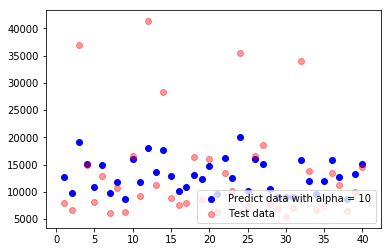

 Alpha  =  20
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.3517255425596465
The R2 in the TEST DATA  is :  0.31189945705833577
 w0(Intercept) =  -2720.3417549339665
 ===== Slopes ==== 
w_ 1 =  1.6577383956021365
w_ 2 =  24.712140227768604
w_ 3 =  2996.0526343113893
w_ 4 =  6863.2500435216825
w_ 5 =  16.767402854057035
w_ 6 =  0.4471222068438899
w_ 7 =  6.806915690056718
w_ 8 =  521.4169724911396
w_ 9 =  32.71020998376962
w_ 10 =  8.792617004172346
w_ 11 =  6.657984016044705
w_ 12 =  -0.06871051819672122
w_ 13 =  -30.696763277894103
w_ 14 =  -29.41530879923924
w_ 15 =  95.18325082114329
w_ 16 =  149.9134914630773
w_ 17 =  -149.9134914630773


 Scatter Plot Predict vs Real Values


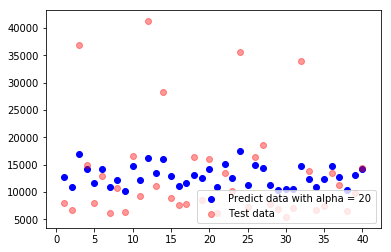

 Alpha  =  50
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.18171179093795198
The R2 in the TEST DATA  is :  0.1593246638399748
 w0(Intercept) =  5396.324130833285
 ===== Slopes ==== 
w_ 1 =  0.7905930198508212
w_ 2 =  12.112284073298591
w_ 3 =  1468.841870257799
w_ 4 =  3282.6290745759734
w_ 5 =  8.997724978793132
w_ 6 =  0.21358030792538318
w_ 7 =  3.150139419529609
w_ 8 =  255.13234657643946
w_ 9 =  20.673422643694867
w_ 10 =  3.919709046345
w_ 11 =  3.1125525671036263
w_ 12 =  -0.035108169313940014
w_ 13 =  -14.899084811530347
w_ 14 =  -14.27726536388841
w_ 15 =  45.07264779344217
w_ 16 =  69.96054341393291
w_ 17 =  -69.96054341393291


 Scatter Plot Predict vs Real Values


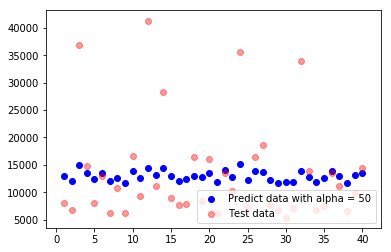

 Alpha  =  100
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.10031041589153145
The R2 in the TEST DATA  is :  0.0869988226217201
 w0(Intercept) =  8923.029754095362
 ===== Slopes ==== 
w_ 1 =  0.4219304492472866
w_ 2 =  6.535921281469147
w_ 3 =  792.4697263750651
w_ 4 =  1756.3095057465787
w_ 5 =  5.00410172317018
w_ 6 =  0.11421321320512252
w_ 7 =  1.6659843932840852
w_ 8 =  137.53175483959194
w_ 9 =  11.963173596992307
w_ 10 =  2.046608818420028
w_ 11 =  1.6516891990359086
w_ 12 =  -0.019207301371242266
w_ 13 =  -8.008802023791102
w_ 14 =  -7.6749569199878085
w_ 15 =  24.027603092956042
w_ 16 =  37.12809609524106
w_ 17 =  -37.12809609524106


 Scatter Plot Predict vs Real Values


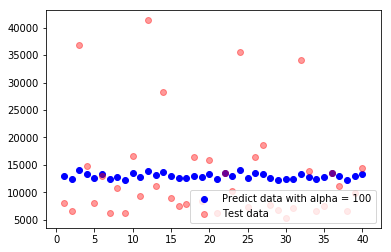

 Alpha  =  1000
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.011046883864899493
The R2 in the TEST DATA  is :  0.00809827482307035
 w0(Intercept) =  12580.600355430488
 ===== Slopes ==== 
w_ 1 =  0.04490101899022683
w_ 2 =  0.7031491860023062
w_ 3 =  85.23265210994654
w_ 4 =  187.47161939969737
w_ 5 =  0.5531935818713897
w_ 6 =  0.01218515172833537
w_ 7 =  0.17593236515986463
w_ 8 =  14.779222317497835
w_ 9 =  1.3638793198992458
w_ 10 =  0.21364833867347233
w_ 11 =  0.17495452232424913
w_ 12 =  -0.0020921482304366136
w_ 13 =  -0.8583773821578974
w_ 14 =  -0.8226558819691349
w_ 15 =  2.555956692508828
w_ 16 =  3.9347192913658793
w_ 17 =  -3.934719291365879


 Scatter Plot Predict vs Real Values


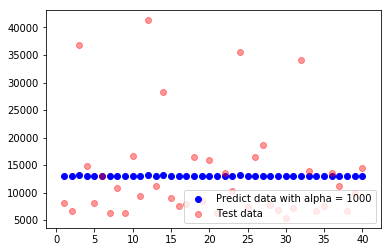

In [73]:
# First step is to create the list with the parameter values:
alpha = [0,1,10,20,50,100,1000]
# We create a function that :
# 1. Creates the Ridge Regression with the alpha value
# 2. Train the model over the data
# 3. Prints out the coeff and R2 values
# 4. Predict and plot the values 
def ridge_regression(alp):
    # Training the regression
    ridge_reg = Ridge(alpha = alp,normalize = True)
    ridge_reg.fit(X_train,y_train)
    
    # R square
    print(" Alpha  = ", alp)
    print("===== R2 ====== ")
    print("The R2 in the TRAINING DATA is : " ,ridge_reg.score(X_train,y_train))
    print("The R2 in the TEST DATA  is : " , ridge_reg.score(X_test,y_test))
    
    # Slopes and intercept
    # Intercept
    print(" w0(Intercept) = " , ridge_reg.intercept_)
    # Slopes
    print(" ===== Slopes ==== ")
    iter_slp = range(1, len(ridge_reg.coef_))
    
    # Now we iterate over this parameter values:
    
    for i in iter_slp:
        print("w_",i, "= ",ridge_reg.coef_[i])
    
    # Predictions 
    y_pred_Ridge = ridge_reg.predict(X_test)
    size_test = list(range(1,len(y_pred_Ridge)+1))
    message = r"Predict data with alpha = " + str(alp)
    print("\n")
    print(" =================================== ")
    print(" Scatter Plot Predict vs Real Values")
    print(" =================================== ")
    plt.scatter(size_test,y_pred_Ridge, color = 'blue',label = message)
    plt.scatter(size_test,y_test,color = 'red',alpha = 0.4,label = r'Test data')
    plt.legend(loc ='lower right')
    plt.show()

    
for alp in alpha:
    ridge_regression(alp)
    




Repeat the same process for the Lasso Regression

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


 Alpha  =  0
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8907508038721387
The R2 in the TEST DATA  is :  0.8211101822482068
 w0(Intercept) =  -64788.44835589535
 ===== Slopes ==== 
w_ 1 =  -0.5291213382774529
w_ 2 =  36.210758164209096
w_ 3 =  -19283.118846910624
w_ 4 =  39097.29198005046
w_ 5 =  220.84938987221946
w_ 6 =  0.07079121736736148
w_ 7 =  119.47404888241275
w_ 8 =  -837.6384441277493
w_ 9 =  -3096.648380556962
w_ 10 =  833.2992278436369
w_ 11 =  22.264255333316044
w_ 12 =  1.3823272378875784
w_ 13 =  94.07844276952858
w_ 14 =  169.34718689602434
w_ 15 =  1603.4429306770762
w_ 16 =  -5826.715921000116
w_ 17 =  2.1286348976454997e-09


 Scatter Plot Predict vs Real Values


C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


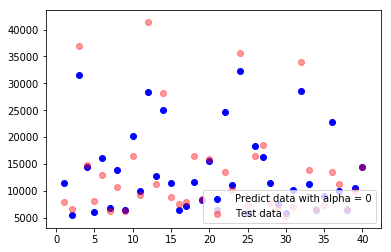

 Alpha  =  1
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8897889487355635
The R2 in the TEST DATA  is :  0.8244705809822168
 w0(Intercept) =  -58546.11730561484
 ===== Slopes ==== 
w_ 1 =  -0.7986018720875742
w_ 2 =  10.151730737389089
w_ 3 =  -13865.237320846309
w_ 4 =  37767.82107207056
w_ 5 =  219.77696242946035
w_ 6 =  0.0
w_ 7 =  126.50556852296484
w_ 8 =  -969.349762682702
w_ 9 =  -3395.770355122315
w_ 10 =  383.4884799669533
w_ 11 =  21.10848288970633
w_ 12 =  1.616015021466187
w_ 13 =  59.51885778410863
w_ 14 =  170.9218960832464
w_ 15 =  1349.9139464172192
w_ 16 =  -0.0
w_ 17 =  0.0


 Scatter Plot Predict vs Real Values


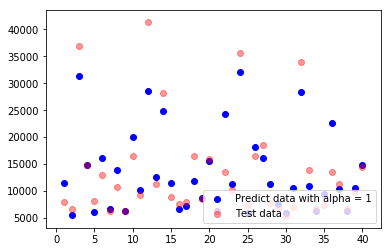

 Alpha  =  10
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8776354185296248
The R2 in the TEST DATA  is :  0.811213479173969
 w0(Intercept) =  -38400.00583838357
 ===== Slopes ==== 
w_ 1 =  -0.0
w_ 2 =  0.0
w_ 3 =  -0.0
w_ 4 =  26458.958917209773
w_ 5 =  105.90822810556398
w_ 6 =  0.0
w_ 7 =  127.0063490706698
w_ 8 =  -503.27718754533294
w_ 9 =  -2872.742883370237
w_ 10 =  278.1746771681928
w_ 11 =  20.759736561688882
w_ 12 =  1.270282542502327
w_ 13 =  0.0
w_ 14 =  0.0
w_ 15 =  514.9835664368292
w_ 16 =  0.0
w_ 17 =  -0.0


 Scatter Plot Predict vs Real Values


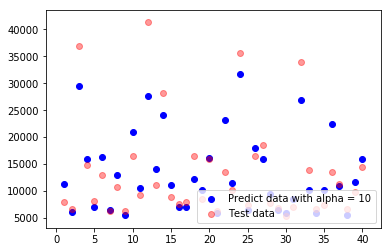

 Alpha  =  20
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8687657576257701
The R2 in the TEST DATA  is :  0.7992320306135854
 w0(Intercept) =  -35818.86024405736
 ===== Slopes ==== 
w_ 1 =  -0.0
w_ 2 =  0.0
w_ 3 =  0.0
w_ 4 =  27825.609517327215
w_ 5 =  52.72395172015429
w_ 6 =  0.0
w_ 7 =  119.01172266992054
w_ 8 =  -0.0
w_ 9 =  -2109.892265652752
w_ 10 =  204.6308453591717
w_ 11 =  20.017417692210504
w_ 12 =  0.6271074837992499
w_ 13 =  -0.0
w_ 14 =  -0.0
w_ 15 =  512.3031942903988
w_ 16 =  0.0
w_ 17 =  -0.0


 Scatter Plot Predict vs Real Values


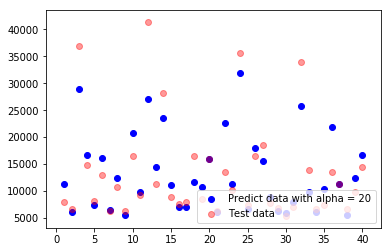

 Alpha  =  50
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8347427302973134
The R2 in the TEST DATA  is :  0.7615875569770455
 w0(Intercept) =  -29790.803420145545
 ===== Slopes ==== 
w_ 1 =  0.0
w_ 2 =  0.0
w_ 3 =  0.0
w_ 4 =  24735.55446816007
w_ 5 =  0.0
w_ 6 =  1.1257848431329471
w_ 7 =  109.2839701435755
w_ 8 =  0.0
w_ 9 =  -294.6346843029367
w_ 10 =  0.0
w_ 11 =  14.538025742513172
w_ 12 =  0.0
w_ 13 =  -0.0
w_ 14 =  -0.0
w_ 15 =  298.60128251293304
w_ 16 =  0.0
w_ 17 =  -0.0


 Scatter Plot Predict vs Real Values


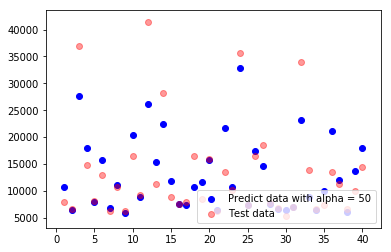

 Alpha  =  100
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.8060356737816605
The R2 in the TEST DATA  is :  0.7293531457003983
 w0(Intercept) =  -17481.24497649956
 ===== Slopes ==== 
w_ 1 =  0.0
w_ 2 =  0.0
w_ 3 =  0.0
w_ 4 =  11474.327109578682
w_ 5 =  0.0
w_ 6 =  1.2346310094752615
w_ 7 =  105.78571097428893
w_ 8 =  0.0
w_ 9 =  -0.0
w_ 10 =  0.0
w_ 11 =  4.1992781836597315
w_ 12 =  0.0
w_ 13 =  -0.0
w_ 14 =  -0.0
w_ 15 =  307.5026616971738
w_ 16 =  0.0
w_ 17 =  -0.0


 Scatter Plot Predict vs Real Values


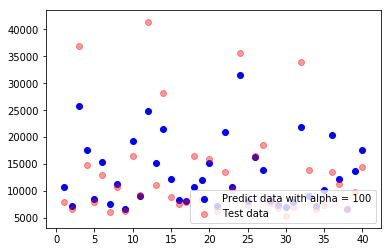

 Alpha  =  1000
===== R2 ====== 
The R2 in the TRAINING DATA is :  0.0
The R2 in the TEST DATA  is :  -0.0016397903658054158
 w0(Intercept) =  13019.647435897436
 ===== Slopes ==== 
w_ 1 =  0.0
w_ 2 =  0.0
w_ 3 =  0.0
w_ 4 =  0.0
w_ 5 =  0.0
w_ 6 =  0.0
w_ 7 =  0.0
w_ 8 =  0.0
w_ 9 =  0.0
w_ 10 =  0.0
w_ 11 =  0.0
w_ 12 =  -0.0
w_ 13 =  -0.0
w_ 14 =  -0.0
w_ 15 =  0.0
w_ 16 =  0.0
w_ 17 =  -0.0


 Scatter Plot Predict vs Real Values


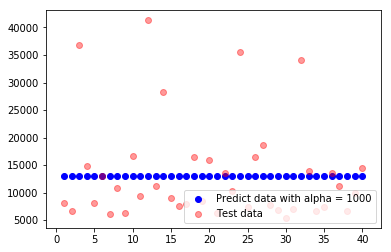

In [77]:
# Its almost the same, but with the exception that this time is lasso, so we are going to use the same function 
# and procedure :
from sklearn.linear_model import Lasso

# First step is to create the list with the parameter values:
alpha = [0,1,10,20,50,100,1000]
# We create a function that :
# 1. Creates the Ridge Regression with the alpha value
# 2. Train the model over the data
# 3. Prints out the coeff and R2 values
# 4. Predict and plot the values 
def lasso_regression(alp):
    # Training the regression
    lasso_reg = Lasso(alpha = alp,normalize = True)
    lasso_reg.fit(X_train,y_train)
    
    # R square
    print(" Alpha  = ", alp)
    print("===== R2 ====== ")
    print("The R2 in the TRAINING DATA is : " ,lasso_reg.score(X_train,y_train))
    print("The R2 in the TEST DATA  is : " , lasso_reg.score(X_test,y_test))
    
    # Slopes and intercept
    # Intercept
    print(" w0(Intercept) = " , lasso_reg.intercept_)
    # Slopes
    print(" ===== Slopes ==== ")
    iter_slp = range(1, len(lasso_reg.coef_))
    
    # Now we iterate over this parameter values:
    
    for i in iter_slp:
        print("w_",i, "= ",lasso_reg.coef_[i])
    
    # Predictions 
    y_pred_Lasso = lasso_reg.predict(X_test)
    size_test = list(range(1,len(y_pred_Lasso)+1))
    message = r"Predict data with alpha = " + str(alp)
    print("\n")
    print(" =================================== ")
    print(" Scatter Plot Predict vs Real Values")
    print(" =================================== ")
    plt.scatter(size_test,y_pred_Lasso, color = 'blue',label = message)
    plt.scatter(size_test,y_test,color = 'red',alpha = 0.4,label = r'Test data')
    plt.legend(loc ='lower right')
    plt.show()

    
for alp in alpha:
    lasso_regression(alp)
    
